<a href="https://colab.research.google.com/github/lavinama/Cruise_ship_data_science/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model for Predicting a Ship's Crew Size

We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. This project is organized as follows: (a) data proprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Import the relevant libraries

In [ ]:
import numpy as np
import scipy
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

### 1. Read the file and display columns.

In [ ]:
df = pd.read_csv('data/cruise_ship_info.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


### 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.

In [ ]:
df[["Age", "Tonnage", "passengers", "length", "cabins", "passenger_density", "crew"]].describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [ ]:
# Do not display the count or quartiles
df.agg(
     {
         "Age": ["mean", "std", "min", "max"],
      "Tonnage": ["mean", "std", "min", "max"],
      "passengers": ["mean", "std", "min", "max"],
      "length": ["mean", "std", "min", "max"],
      "cabins": ["mean", "std", "min", "max"],
      "passenger_density": ["mean", "std", "min", "max"],
      "crew": ["mean", "std", "min", "max"],
     }
)

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


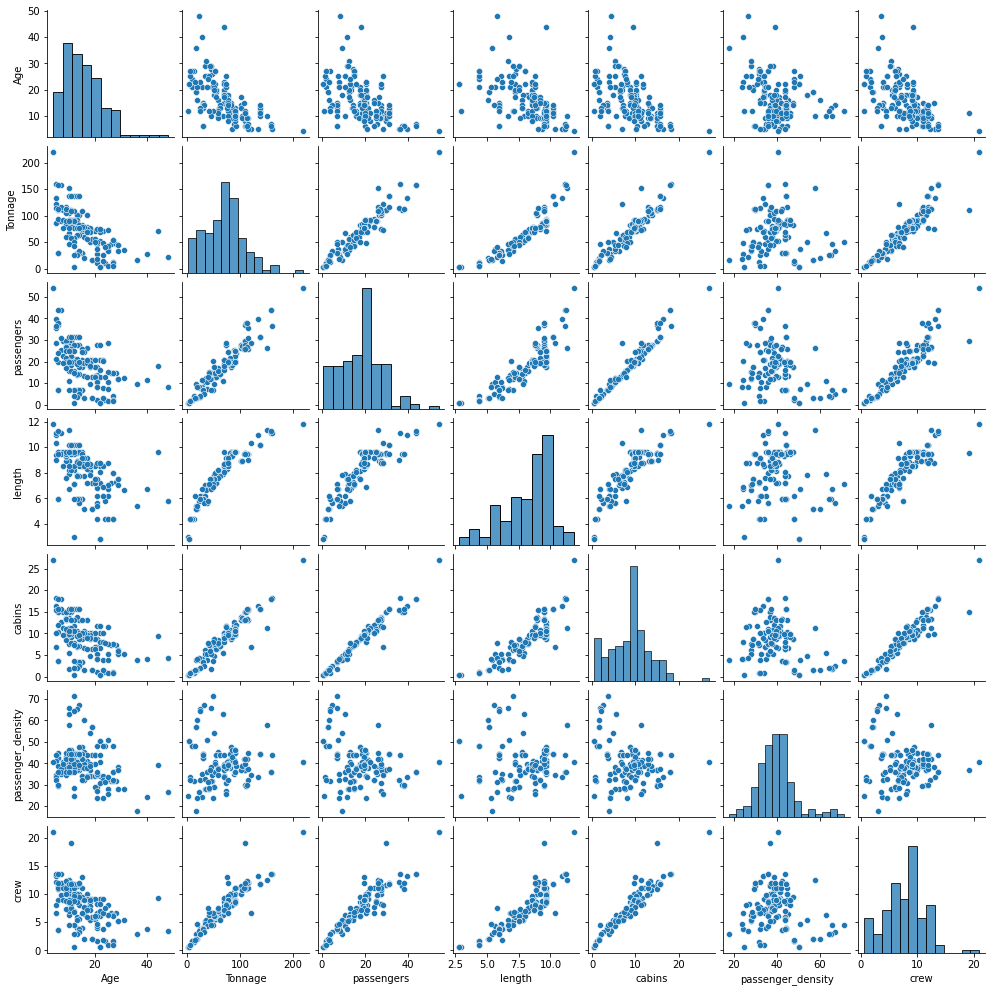

In [ ]:
# Only retrieve numerical variables
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

# Examine the data
import seaborn as sns
sns.pairplot(df[cols], height=2.0)

Obervations:
* We observe that variables are on different scales, for example the Age variable ranges from about 16 years to 48 years, while the Tonnage variable ranges from 2 to 220, see probability density plots below. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data.
*  We also observe that the target variable 'crew' correlates well with 4 predictor variables, namely, 'Tonnage', 'passengers', 'length', and 'cabins'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


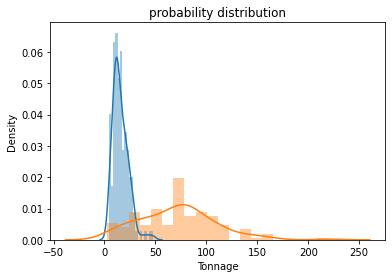

In [ ]:
# Prob dist Age
sns.distplot(df['Age'],bins=20)
plt.title('probability distribution')

# Prob dist Tonnage
sns.distplot(df['Tonnage'],bins=20)
plt.title('probability distribution')

plt.show()

### 3. Select columns that will be probably important to predict “crew” size.

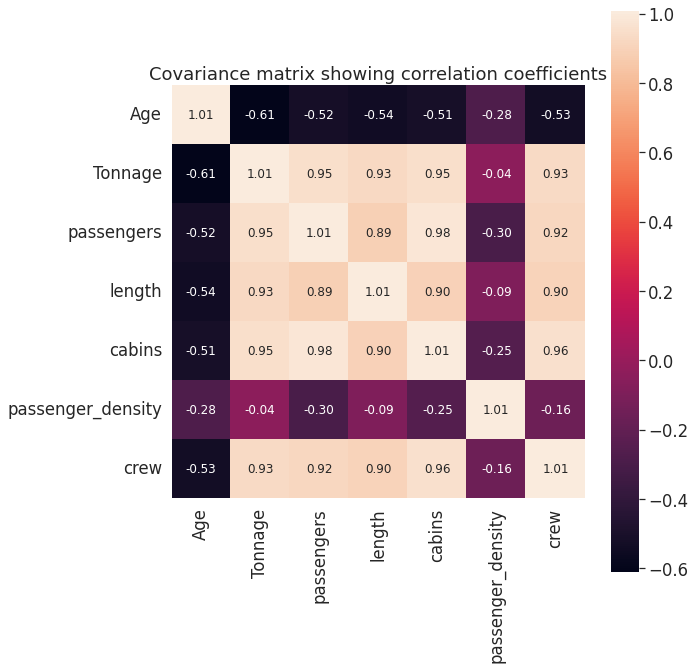

In [ ]:
# Calculate the covariance matrix
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

from sklearn.preprocessing import StandardScaler
# Standardize features
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [ ]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
filtered_df = df[cols_selected]
filtered_df.head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


### 4. If you removed columns explain why you removed those.

**Explanation of why removed columns**:

* **Ship_name**: The crew size is not decided depending on the name of the ship

* **Cruise_line**: A cruise line which has bigger ships normally has
a larger crew size, but then that means that the crew size is related to the size of the ship not the cruise line.

* **Age**: it may be the case that in the past ships were smaller so they require a smaller crew size, but as before crew size is related to the size of the ship. It may also be the case that older ships require more maintenance so a larger crew size may be needed. Because there may be a lot of noise associated with this variable, it was removed.

* **Passenger Density**: Given that I have included passengers, including another metric that measured the number of passengers in some way was considered as redundant and would only add noise to the model.

### 5. Use one-hot encoding for categorical features.

In [ ]:
# Cruise_line can be considered a categorical feature

# Check the datatypes of the features
## print(df.dtypes)
# Make sure the categorical variables are of the correct type
categ_df = df.copy()
categ_df['Cruise_line'] = df.Cruise_line.astype('category')
## print(categ_df.dtypes)

# Get one hot encoding of columns B
one_hot = pd.get_dummies(categ_df['Cruise_line'])

# Drop column B as it is now encoded
one_hot_df = df.drop('Cruise_line',axis = 1)

# Join the encoded df
one_hot_df = one_hot_df.join(one_hot)
one_hot_df.head()

,Ship_name,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Azamara,Carnival,...,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,Journey,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Quest,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Celebration,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Conquest,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Destiny,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,...,0,0,0,0,0,0,0,0,0,0


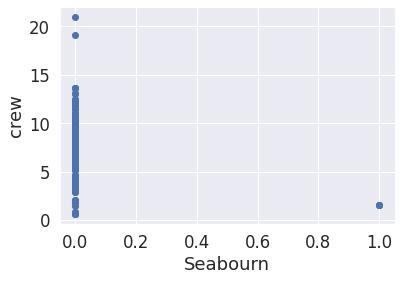

In [ ]:
# Display the relationship between crew and the ship being of the cruise line Seaborn
plt.scatter(one_hot_df['Seabourn'], one_hot_df['crew'])
plt.xlabel('Seabourn')
plt.ylabel('crew')
plt.show()

Observations:
* We can see from this scatter plot that there is no relationship between the cruise line and the number of crew members

### 6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

In [ ]:
from sklearn.model_selection import train_test_split

# 40% for testing
train, test = train_test_split(filtered_df, test_size=0.4, random_state=100)
train.head()

,Tonnage,passengers,length,cabins,crew
153,3.341,0.66,2.79,0.33,0.59
22,110.000,29.74,9.52,14.87,11.60
69,35.143,12.50,6.69,5.32,5.35
140,78.491,24.35,9.15,10.00,6.60
33,47.225,13.66,6.82,6.87,6.70


In [ ]:
# If we were to use Train/Val/Test (60/20/20)
"""
 X_train, X_test, y_train, y_test 
    = train_test_split(X, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
"""

'\n X_train, X_test, y_train, y_test \n    = train_test_split(X, y, test_size=0.2, random_state=1)\n\n X_train, X_val, y_train, y_val \n    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2\n'

In [ ]:
# Divide the dataframe into the features and the predicted values
X_train = train.iloc[:, :4]
y_train = train['crew']
X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, :4], train['crew'], test_size=0.25, random_state=1)
X_train.head()

,Tonnage,passengers,length,cabins
8,70.367,20.52,8.55,10.20
74,34.250,10.52,6.15,5.26
72,16.852,9.52,5.41,3.83
105,91.627,19.74,9.64,9.87
129,158.000,43.70,11.25,18.00


### 7. Build a machine learning model to predict the ‘crew’ size.

##### Select the best machine learning model

Helping notes:
* **PolynomialFeatures**: Generate polynomial and interaction features. From 2D input [a, b] to 2D features  [1, a, b, a^2, ab, b^2]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

def model_performance(model):
    # fit to an order-3 polynomial data
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    print("mse: ", mse)

# 1. Polynomial regression 3-degree
print("Polynomial regression 3-degree")
model_1 = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_1)
print()

# 2. Linear regression
print("Linear regression")
model_linear = Pipeline([('poly', PolynomialFeatures(degree=1)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_linear)
print()

# 3. Support Vector Regression
print("Support Vector Regression")
from sklearn import svm

model_3 = Pipeline([('svr', svm.SVR())])
model_performance(model_3)
print()

# 4. Nu Support Vector Regression
print("Nu Support Vector Regression")
from sklearn import svm

model_4 = Pipeline([('nu_svr', svm.NuSVR())])
model_performance(model_4)
print()

# 5. Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGD")
from sklearn.linear_model import SGDRegressor

model_5 = Pipeline([('sgd', SGDRegressor())])
model_performance(model_5)
print()

# 6. Multi-layer Perceptron regressor.
print("Multi-layer Perceptron regressor")
from sklearn.neural_network import MLPRegressor

model_6 = Pipeline([('mlp', MLPRegressor(hidden_layer_sizes=(1,)))]) # , activation='identity', alpha=0.01, learning_rate='adaptive'))])
model_performance(model_6)
print()


Polynomial regression 3-degree
mse:  68.11841350124466

Linear regression
mse:  2.5983315074446853

Support Vector Regression
mse:  3.3707403329083303

Nu Support Vector Regression
mse:  3.7061700048146275

SGD
mse:  5.423280746783106e+25

Multi-layer Perceptron regressor
mse:  735.3566424517098



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


We can see that the best machine learning model (the one with the lowest mean squared error) will be a multi-regression model expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{4} X_{ij} w_j $$

In [ ]:
# We can now use the complete training dataset
X_train = train.iloc[:, 0:4]
y_train = train['crew']
X_test = test.iloc[:, 0:4]
y_test = test['crew']

In [ ]:
# Train the model on the complete dataset
model_linear.fit(X_train, y_train)
y_train_pred = model_linear.predict(X_train)
y_test_pred = model_linear.predict(X_test)

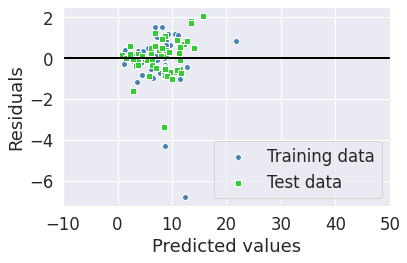

In [ ]:
# Plot the predicted values agains the residuals

## Plot the predicted values of the training dataset
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
## Plot the predicted values of the test dataset
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

##### Evaluate the machine learning model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE: train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2: train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE: train: 1.092, test: 0.764
R^2: train: 0.915, test: 0.932


##### Calculate the regression coefficients

In [ ]:
intercept = model_linear.fit(X_train, y_train)['linear'].intercept_
coeff = model_linear.fit(X_train, y_train)['linear'].coef_

print("intercept", intercept)
print("coeff", coeff)

intercept 0.0
coeff [-0.15931302  0.02851856 -0.18741408  0.21927879  0.86048782]


##### Introduce Principal Component Analysis (PCA)

PCA is used for dimensionality reduction. Dimensionality reduction means reducing the number of features in a dataset.
There are two possible ways to do this:
* Linear methods (PCA)
* Non-linear methods (Manifold learning)

PCA transforms a set of correlated variables ($p$) into a smaller ($k \ < \ p$) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.

**How does PCA work?**

If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space.

*Note:* Very important to perform standardise the features before performing PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Test for different number of components of PCA
sc_x = StandardScaler()
sc_y = StandardScaler()

train_score = []
val_score = []
cum_variance = []

X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

for i in range(1,5):
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_val_pred_std=pipe_lr.predict(X_val)

    y_train_pred=sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
    y_val_pred=sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    val_score = np.append(test_score, r2_score(y_val, y_val_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

print("train_score: ", train_score)
print("val_score: ", val_score)
print("cum_variance: ", cum_variance)

train_score:  [0.87004197 0.87004293 0.87008271 0.89485277]
val_score:  [0.96113802 0.96110878 0.96087513 0.9576968  0.9576968 ]
cum_variance:  [0.94766213 0.9816977  0.99545173 1.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


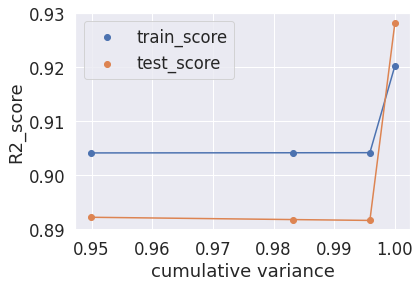

In [ ]:
# Plot graphs of R^2 score as we change the number of PCA components

plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

**Observation**

We observe that by increasing the number of principal components from 1 to 4, the train and test scores improve. This is because with less components, there is high bias error in the model, since model is overly simplified. As we increase the number of principal components, the bias error will reduce, but complexity in the model increases

##### Calculate the average performance of the model:

1. Standardise the features
2. Reduce the dimensionality of the data using Principal Component Analysis (PCA) to 4.
3. Apply linear regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

train_score = []
test_score = []

cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

X = df[cols_selected].iloc[:,0:4].values
y = df[cols_selected].iloc[:, -1]

sc_x = StandardScaler()
sc_y = StandardScaler()

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)
    
    # Feature standardisation
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

    # Train the model
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    
    # Calculate the predicted values
    y_train_pred_std = pipe_lr.predict(X_train)
    y_test_pred_std = pipe_lr.predict(X_test)

    y_train_pred = sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
    y_test_pred = sc_y.inverse_transform(y_test_pred_std.reshape(-1, 1))

    # Calculate the r2_score
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

In [ ]:
print("train_score: ", train_score)
print("test_score: ", test_score)
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score), np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

train_score:  [0.92028261 0.91733937 0.94839385 0.93899476 0.90621451 0.91156903
 0.92726066 0.94000795 0.93922948 0.93629554]
test_score:  [0.92827978 0.93807946 0.8741834  0.89901199 0.94781315 0.91880183
 0.91437408 0.89660876 0.90427477 0.90139208]
R2 train: 0.929 +/- 0.013
R2 test: 0.912 +/- 0.021


### 8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

In [ ]:
import numpy as np

# Turn the dataset into numpy format
train_np = train.to_numpy()
test_np = test.to_numpy()

print("Train", end = ": ")
pearsonr_train = np.corrcoef(train_np)
# print(pearsonr_train)

print("Test", end = ": ")
pearsonr_test = np.corrcoef(test_np)
# print(pearsonr_test)

import scipy
x_train_np = X_train
y_train_np = y_train
print(x_train_np.shape)
print(y_train_np.shape)

# TODO: try and calculate pearson corr. ceoff. using scipy
# r, p_value = scipy.stats.pearsonr(x_train_np, y_train_np)

Train: Test: (94, 4)
(94,)


ValueError: ignored

### 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.


Best model was `LinearRegression` so we use that one

Hyperparameters for `LinearRegression`:
* **fit_intercept**: Whether to calculate the intercept for this model. Set to false as the data is expected to be centred.
* **normalize**: Not relevant as we set `fit_intercept` to false
* **positive**: Set to False. We have not forced the coefficients to be positive

### 10. What is regularization? What is the regularization parameter in your model?

**Regularisation**: a process that changes the result answer to be "simpler". It is often used to prevent overfitting (This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance). It does this by shrinking the coefficient estimates towards zero.

2 types of regulisation:
* **Ridge**: Uses L2 Norm. Problem with ridge is that it is less interpretable. It will shrink the coefficients for least important predictors to zero but not exactly zero.
* **Lasso**: Uses L1 Norm. By using this norm, we only in penalizing the high coefficients. It will shrink the coefficients for least important predictors to zero.

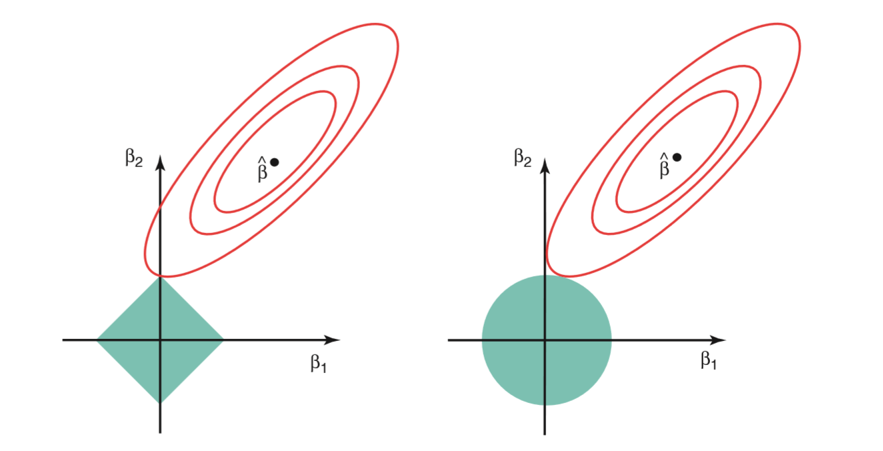 \\
Lasso to the left and Ridge to the right

In [ ]:
### 2 types of regression
from sklearn.linear_model import Lasso, Ridge

# Linear
print("Linear")
model_linear = Pipeline([('linear', LinearRegression())])
model_performance(model_linear)
print()

# 1. Ridge
print("Ridge")
model_ridge = Pipeline([('ridge', Ridge(alpha=0.001))])
model_performance(model_ridge)
print()

# 2. Lasso
print("Lasso")
model_lasso = Pipeline([('lasso', Lasso(alpha=0.001))])
model_performance(model_lasso)
print()

Linear
mse:  2.707509106102023

Ridge
mse:  2.7075082753804423

Lasso
mse:  2.7072908107625477



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The regulirisation parameter in our model is `alpha` (known as $λ$). The lower the value, the lower the amount of regularisation so the more complex the model is.

### 11. Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem.

Best result is the Lasso so we are going to find the optimim value for `alpha`

In [ ]:
from sklearn.model_selection import train_test_split

X = df[cols_selected].iloc[:,0:4].values
y = df[cols_selected].iloc[:, -1]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.4, random_state=0)

y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_val_std = sc_x.transform(X_val)

alpha = np.linspace(0.01,0.4,10)

lasso = Lasso(alpha=0.7)

r2_train=[]
r2_val=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std, y_train_std)

    y_train_std = lasso.predict(X_train_std)
    y_val_std = lasso.predict(X_val_std)

    r2_train = np.append(r2_train, r2_score(y_train, sc_y.inverse_transform(y_train_std.reshape(-1, 1))))
    r2_val = np.append(r2_val, r2_score(y_val, sc_y.inverse_transform(y_val_std.reshape(-1, 1))))

    norm = np.append(norm,np.linalg.norm(lasso.coef_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


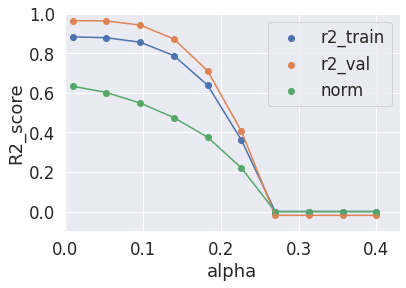

In [ ]:
# Plot for different values of alpha how it affects the R^2 score
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_val,label='r2_val')
plt.plot(alpha,r2_val)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)

plt.ylim(-0.1,1)
plt.xlim(0,.43)

plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

**Observation**

We observe that as the regularization parameter $\alpha$ increases, the norm of the regression coefficients become smaller and smaller. This means more regression coefficients are forced to zero, which intend increases bias error (over simplification). The best value to balance bias-variance tradeoff is when $\alpha$ is kept low, say $\alpha = 0.1$ or less.

### Extra notes

##### How to deal with missing data?

Sample dataset

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "Date": pd.date_range(start="2022-06-01", periods=10, freq="D"),
    "Item": 1014,
    "Measure_1": np.random.randint(1, 10, size=10),
    "Measure_2": np.random.random(10).round(2),
    "Measure_3": np.random.random(10).round(2),
    "Measure_4": np.random.randn(10),
})
df_orig = df.copy()
# Delete some data

df.loc[[2, 9], "Item"] = np.nan
df.loc[[2, 7, 9], "Measure_1"] = np.nan
df.loc[[2, 3], "Measure_2"] = np.nan
df.loc[[2], "Measure_3"] = np.nan
df.loc[:6, "Measure_4"] = np.nan

# Explicitly declare the data type
df = df.astype({
    "Item": pd.Int64Dtype(),
    "Measure_1": pd.Int64Dtype()}
)
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2022-06-01,1014,2,0.59,0.22,NaN
1,2022-06-02,1014,2,0.04,0.15,NaN
2,2022-06-03,<NA>,<NA>,NaN,NaN,NaN
3,2022-06-04,1014,8,NaN,0.53,NaN
4,2022-06-05,1014,7,0.91,0.72,NaN
5,2022-06-06,1014,4,0.51,0.04,NaN
6,2022-06-07,1014,7,0.46,0.62,NaN
7,2022-06-08,1014,<NA>,0.56,0.20,-0.601247
8,2022-06-09,1014,5,0.53,0.22,0.028768
9,2022-06-10,<NA>,<NA>,0.85,0.02,-0.107446


In [ ]:
# 1. Drop rows or columns with missing values
df1 = df.dropna()
print(df1)
print()
df2 = df.dropna(how="all") # Only have missing values
print(df2)
print()
df3 = df.dropna(subset=["Measure_2", "Measure_3"]) # Drop subset of col
print(df3)
print()

        Date  Item  Measure_1  Measure_2  Measure_3  Measure_4
8 2022-06-09  1014          2       0.04       0.68  -1.067125

        Date  Item  Measure_1  Measure_2  Measure_3  Measure_4
0 2022-06-01  1014          9       0.12       0.09        NaN
1 2022-06-02  1014          5       0.97       0.67        NaN
2 2022-06-03  <NA>       <NA>        NaN        NaN        NaN
3 2022-06-04  1014          7        NaN       0.51        NaN
4 2022-06-05  1014          7       0.38       0.35        NaN
5 2022-06-06  1014          1       0.71       0.40        NaN
6 2022-06-07  1014          6       0.31       0.12        NaN
7 2022-06-08  1014       <NA>       0.92       0.30  -0.769504
8 2022-06-09  1014          2       0.04       0.68  -1.067125
9 2022-06-10  <NA>       <NA>       0.95       0.43  -1.058843

        Date  Item  Measure_1  Measure_2  Measure_3  Measure_4
0 2022-06-01  1014          9       0.12       0.09        NaN
1 2022-06-02  1014          5       0.97       0.67  

In [ ]:
# 2. Fill rows or columns with missing values
values = {"Item": 1014, "Measure_1": 0}
df4 = df.fillna(value=values)
df4

df5 = df.copy()
df5["Measure_2"] = df5["Measure_2"].fillna(df5["Measure_2"].mean()) # fill with aggregated value
df5

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2022-06-01,1014,9,0.12,0.09,NaN
1,2022-06-02,1014,5,0.97,0.67,NaN
2,2022-06-03,<NA>,<NA>,0.55,NaN,NaN
3,2022-06-04,1014,7,0.55,0.51,NaN
4,2022-06-05,1014,7,0.38,0.35,NaN
5,2022-06-06,1014,1,0.71,0.40,NaN
6,2022-06-07,1014,6,0.31,0.12,NaN
7,2022-06-08,1014,<NA>,0.92,0.30,-0.769504
8,2022-06-09,1014,2,0.04,0.68,-1.067125
9,2022-06-10,<NA>,<NA>,0.95,0.43,-1.058843


In [ ]:
# Replace with previous or next value
df6 = df.fillna(method="bfill", limit=1) # limit so it can only be filled by next value
df6

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2022-06-01,1014,9,0.12,0.09,-0.769504
1,2022-06-02,1014,5,0.97,0.67,-0.769504
2,2022-06-03,1014,7,0.38,0.51,-0.769504
3,2022-06-04,1014,7,0.38,0.51,-0.769504
4,2022-06-05,1014,7,0.38,0.35,-0.769504
5,2022-06-06,1014,1,0.71,0.40,-0.769504
6,2022-06-07,1014,6,0.31,0.12,-0.769504
7,2022-06-08,1014,2,0.92,0.30,-0.769504
8,2022-06-09,1014,2,0.04,0.68,-1.067125
9,2022-06-10,<NA>,<NA>,0.95,0.43,-1.058843


In [ ]:
# Fill by using another dataframe
df7 = df.fillna(df_orig)
df7

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2022-06-01,1014,2,0.59,0.22,-0.076028
1,2022-06-02,1014,2,0.04,0.15,-0.548175
2,2022-06-03,1014,7,0.44,0.01,0.432621
3,2022-06-04,1014,8,0.51,0.53,0.026493
4,2022-06-05,1014,7,0.91,0.72,0.360207
5,2022-06-06,1014,4,0.51,0.04,1.286630
6,2022-06-07,1014,7,0.46,0.62,0.337030
7,2022-06-08,1014,8,0.56,0.20,-0.601247
8,2022-06-09,1014,5,0.53,0.22,0.028768
9,2022-06-10,1014,5,0.85,0.02,-0.107446
